In [2]:
#*******************
# Jacob van de Lindt
# 3/8/2024
# Description: notebook to help get comfortable with eqdsks
#*******************

import numpy as np
import matplotlib.pyplot as plt


# import functions from the getGfileDict.py file, should be in same directory level as this notebook 
import getGfileDict

In [3]:
# I have MANTA's example eqdsk saved as file 'ips-eqdsk.geq'. Use equilibrium_process helper functions to read the
# file and save in a dictunary 

eqdsk_file='ips-eqdsk.geq'  # the eqdsk file

 
eq0 = getGfileDict.getGfileDict('ips-eqdsk.geq')  # the equilibrium 


In [4]:
# print out all the keys in the eq0 dictunary 
print(f'The type of eq0 is: {type(eq0)}')
print('Its keys are: ')
print(eq0.keys())

The type of eq0 is: <class 'dict'>
Its keys are: 
dict_keys(['header', 'idum', 'mw', 'mh', 'xdim', 'zdim', 'rzero', 'rgrid1', 'zmid', 'rmaxis', 'zmaxis', 'ssimag', 'ssibdry', 'bcentr', 'cpasma', 'ssibry', 'rgrid', 'zgrid', 'psirz', 'psirzraw', 'fpol', 'pres', 'ffprim', 'pprime', 'qpsi', 'nbbbs', 'rbbbs', 'zbbbs', 'nlim', 'xlim', 'ylim', 'isPlasma', 'pressrz', 'qrz', 'btrz', 'brrz', 'bzrz', 'jtrz', 'npsimid', 'gammamid', 'bzmid', 'btmid', 'jtmid', 'pressmid', 'qmid'])


On-axis magnetic field: 11.08 T
On-axis major radius: 4.73740835 m


Text(0, 0.5, 'Z [m]')

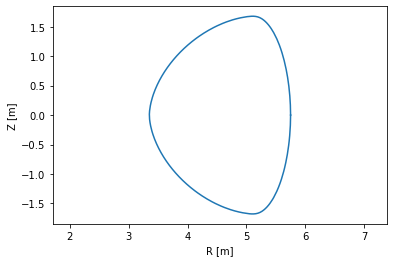

In [5]:
# now lets try to recreate a plot like the default that pops out. 

# first print some usful info:
B0 = eq0['bcentr']
R0 = eq0['rmaxis']
print(f'On-axis magnetic field: {B0} T')
print(f'On-axis major radius: {R0} m')

# now lets grab the last closed flux surface and plot it 
R_LCFS = eq0['rbbbs']  # R coords of the last closed flux surface
Z_LCFS = eq0['zbbbs']  # Z coords of the last closed flux surface
plt.axis('equal')
plt.plot(R_LCFS, Z_LCFS)
plt.xlabel('R [m]')
plt.ylabel('Z [m]')


Text(0, 0.5, 'Z [m]')

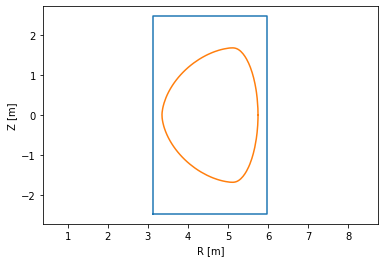

In [6]:
# Now add the limiter. Note we didn't make one so this is just a box. Not super important 
R_LIM = eq0['xlim']  # R coords of the first wall
Z_LIM = eq0['ylim']  # Z coords of the first wall 
plt.plot(R_LIM, Z_LIM)
plt.axis('equal')
plt.plot(R_LCFS, Z_LCFS)
plt.xlabel('R [m]')
plt.ylabel('Z [m]')


In [7]:
# Now lets plot a bunch of flux surfaces. Grab the R, Z, coords and the R x Z gris of psi values 
R = eq0["rgrid"]
Z = eq0["zgrid"]
psirz = eq0["psirz"]
print(R.shape)
print(Z.shape)
print(psirz.shape)

# in order to normalize to the last close flux surface value, pull the flux value at the axis and at the last closed flux surface
psi_mag_axis = eq0["ssimag"]
psi_boundary = eq0["ssibdry"]

# normalize the psirz mesh so that the norm is 1 on boundary and zero on axis 
psirzNorm = (psirz - psi_mag_axis)/(psi_boundary-psi_mag_axis) 

# create 2D interpolation to create a contour plot from 
from scipy.interpolate import interp2d
rInterp = np.linspace(np.min(R), np.max(R), 200)
zInterp = np.linspace(np.min(Z), np.max(Z), 200)
psirzNormInterp = interp2d(R,Z, psirzNorm, kind = 'cubic')(rInterp, zInterp)

# now we are all set to supply our grid to the psirzNormInterp function and spit out the flux value. 


(129,)
(129,)
(129, 129)


Text(0, 0.5, 'Z [m]')

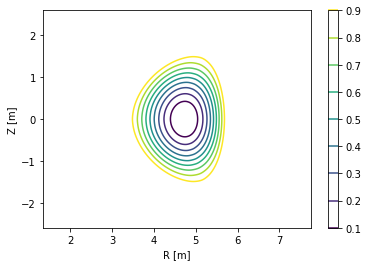

In [8]:
# Manually enter the normalized flux contours you want to see 
psinorms_to_plot = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# plot our normalized flux surfaces 
Rmesh, Zmesh = np.meshgrid(rInterp, zInterp)

plt.axis('equal')
plt.contour(Rmesh, Zmesh, psirzNormInterp, levels=psinorms_to_plot)
plt.colorbar()
plt.xlabel('R [m]')
plt.ylabel('Z [m]')

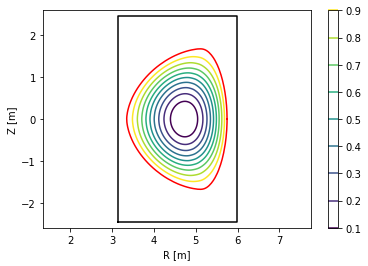

In [9]:
# now lets add in the last closed flux surface in red and the limiter in black
plt.axis('equal')
plt.contour(Rmesh, Zmesh, psirzNormInterp, levels=psinorms_to_plot)
plt.colorbar()
plt.xlabel('R [m]')
plt.ylabel('Z [m]')
plt.plot(R_LIM, Z_LIM, color='k')
plt.axis('equal')
plt.plot(R_LCFS, Z_LCFS, color='red')

<a list of 100 PathCollection objects>


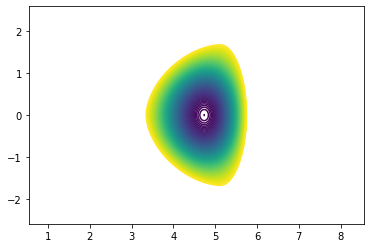

In [10]:
# now lets get the volume elements between all the flux surfaces above, revolved around the torour of course! 
psinorms_for_dvol = np.linspace(0.0001, 1, 100)  # get 100 surfaces for good volume elements

# The corrisponding rho_tor array for the density and temp profiles is defined as 
rho_tor = np.sqrt(psinorms_for_dvol)


cs = plt.contour(Rmesh, Zmesh, psirzNormInterp, levels=psinorms_for_dvol)
plt.axis('equal')
# the collections contains the 9 contours we made with the levels argument 
print(cs.collections)

num_contours = len(cs.collections)
R_contour_coords = []  # lists to store the R and Z coords of the contour. Note bigger contours have more points. Will need to interpolate later 
Z_contour_coords = []
for item in cs.collections:
   for i in item.get_paths():
      v = i.vertices
      x = v[:, 0]
      R_contour_coords.append(x)
      y = v[:, 1]
      Z_contour_coords.append(y)




(4.505088451812842,
 4.956514370722451,
 -0.2946049304488625,
 0.29459974179137577)

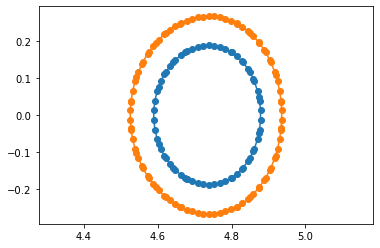

In [11]:
# for example, plot the third and 5th contours:
plt.plot(R_contour_coords[2], Z_contour_coords[2])
plt.scatter(R_contour_coords[2], Z_contour_coords[2])

plt.plot(R_contour_coords[4], Z_contour_coords[4])
plt.scatter(R_contour_coords[4], Z_contour_coords[4])
plt.axis('equal')

[-0.17258667 -0.16978392 -0.16240804 -0.14947732 -0.14366332 -0.13243143
 -0.11754271 -0.11007829 -0.09142211 -0.07719695 -0.06530151 -0.0391809
 -0.0130603   0.0130603   0.0391809   0.06530151  0.07719384  0.09142211
  0.11007437  0.11754271  0.13242727  0.14366332  0.14947317  0.16240337
  0.16978392  0.17258232  0.17973017  0.18485431  0.1879113   0.18888586
  0.18776436  0.18449382  0.17903478  0.17126012  0.16978392  0.15980412
  0.14550378  0.14366332  0.12540449  0.11754271  0.0976196   0.09142211
  0.06530151  0.04890025  0.0391809   0.0130603  -0.0130603  -0.0391809
 -0.04890395 -0.06530151 -0.09142211 -0.09762385 -0.11754271 -0.12540901
 -0.14366332 -0.14550822 -0.15980904 -0.16978392 -0.17126467 -0.17903954
 -0.18449872 -0.18776934 -0.18889085 -0.18791624 -0.18485911 -0.17973478
 -0.17258667]


(4.574972990789667,
 4.893078107735551,
 -0.19898841268907144,
 0.023157859326423592)

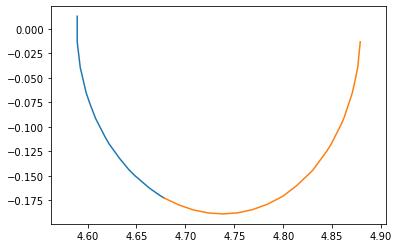

In [17]:
print(Z_contour_coords[2])
idx = 14
plt.plot(R_contour_coords[2][:idx], Z_contour_coords[2][:idx])

idx2 = 21
plt.plot(R_contour_coords[2][-idx2:], Z_contour_coords[2][-idx2:])
plt.axis('equal')

In [ ]:
# need a function that takes in a contour, breaks it into its upper and lower parts,
# then for each part, interpolates all points to the same R grid. 
# then it computes the integral trapz(contour*R) dR of the two curves
# then it subtracs the two integrals and multiplies by 2pi
# finally, dV = lower + upper integral difference

# then an outer function takes in a rho grid and an eqdsk, and then returns the corrisponding dV array 